In [1]:
# physics 411 final project code:

# import libraries

import numpy as np
import random as rn
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
import scipy as sp
from scipy.stats import norm
import datetime 
import matplotlib.dates as mdates
import random
import matplotlib.ticker as plticker
from scipy import signal
from scipy.stats.distributions import chi2
import scipy.integrate as integrate
import scipy.interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d
from numpy.polynomial import Polynomial
from metpy import interpolate as interpmp

In [447]:
path = '/Users/benrasmussen/Documents/Phys 411/Assignments/Final Project/'

In [479]:
# this is the hourly temperature:

hourly_col =np.loadtxt("/Users/benrasmussen/Documents/Phys 411/Data/UVic_weatherdata_temperature_hourly.dat")
hourly_temp =np.loadtxt("/Users/benrasmussen/Documents/Phys 411/Data/UVic_weatherdata_temperature_hourly.dat").T

time = hourly_temp[0]

# clean up header

time = time[3:]

# station data with headers removed:

bowser_t = hourly_temp[1][3:]; cortes_t = hourly_temp[2][3:]; craigflower_t = hourly_temp[3][3:];
cumberland_t = hourly_temp[4][3:]; happyvalley_t = hourly_temp[5][3:]; jamesbay_t = hourly_temp[6][3:];
macauley_t = hourly_temp[7][3:]; monterey_t = hourly_temp[8][3:]; phoenix_t = hourly_temp[9][3:]
rvyc_t = hourly_temp[10][3:]; rogers_t = hourly_temp[11][3:]; shawniganlake_t = hourly_temp[12][3:]
strawberry_t = hourly_temp[13][3:]; uvicsci_t = hourly_temp[14][3:]; viu_t = hourly_temp[15][3:]

all_temps = [bowser_t,cortes_t,craigflower_t,cumberland_t,happyvalley_t,
                jamesbay_t,macauley_t,monterey_t,phoenix_t,rvyc_t,rogers_t,
                shawniganlake_t,strawberry_t,uvicsci_t,viu_t]

# coordinates:

longitude = hourly_col[0][1:]
latitude = hourly_col[1][1:]
elevation = hourly_col[2][1:]
coordinates = np.array(list(zip(longitude, latitude)))

# this is the hourly pressure data:


# this is the hourly temperature:

hourly_col_p =np.loadtxt("/Users/benrasmussen/Documents/Phys 411/Data/UVic_weatherdata_pressure_hourly.dat")
hourly_pres =np.loadtxt("/Users/benrasmussen/Documents/Phys 411/Data/UVic_weatherdata_pressure_hourly.dat").T

time = hourly_pres[0]

# clean up header

time = time[3:]

# station data with headers removed:

bowser_p = hourly_pres[1][3:]; cortes_p = hourly_pres[2][3:]; craigflower_p = hourly_pres[3][3:];
cumberland_p = hourly_pres[4][3:]; happyvalley_p = hourly_pres[5][3:]; jamesbay_p = hourly_pres[6][3:];
macauley_p = hourly_pres[7][3:]; monterey_p = hourly_pres[8][3:]; phoenix_p = hourly_pres[9][3:]
rvyc_p = hourly_pres[10][3:]; rogers_p = hourly_pres[11][3:]; shawniganlake_p = hourly_pres[12][3:]
strawberry_p = hourly_pres[13][3:]; uvicsci_p = hourly_pres[14][3:]; viu_p = hourly_pres[15][3:]

all_pres = [bowser_p,cortes_p,craigflower_p,cumberland_p,happyvalley_p,
                jamesbay_p,macauley_p,monterey_p,phoenix_p,rvyc_p,rogers_p,
                shawniganlake_p,strawberry_p,uvicsci_p,viu_p]



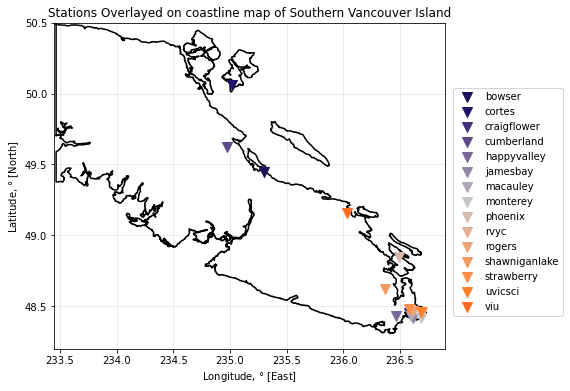

In [480]:
# this is the coast line data set:

coast_line = np.loadtxt("/Users/benrasmussen/Documents/Phys 411/Data/VI_Coast_updated.dat").T
                        
                        

# plots the stations on top of the coastline:

labels=['bowser','cortes','craigflower','cumberland','happyvalley',
                'jamesbay','macauley','monterey','phoenix','rvyc','rogers',
                'shawniganlake','strawberry','uvicsci','viu']

colours=['#778515','#807402', '#866300', '#885205', '#874010', 
         '#822f1a', '#7a1f21', '#6f0e28', '#6e002f', '#6c0038',
         '#670041', '#5e004d', '#510058', '#3d0064', 'k']

colours=['#3d0064','#591d55','#753265','#914976','#ad6087','#c87898',
         '#e492ab','#ffacbe','#ff9ea9','#ff9091','#fe8478','#f77a5c','#ed733e',
         '#de6e18','#c96416']

colours=['#1f105c','#231269','#432e79','#5f4a88','#796898','#9386a7',
         '#ada6b7','#c6c6c6','#d6bbad','#e2b094','#eca57b',
         '#f49962','#fa8d48','#ff802b','#ff6c21']







# plots the interpolate data set with stations labelled:



width=7
height=6
ff, (ax1) = plt.subplots(1,1)
ff.set_figwidth(width)
ff.set_figheight(height)

for idx in range(len(coordinates[:,0])):
    ax1.scatter(coordinates[:,0][idx], coordinates[:,1][idx], label=labels[idx],s=100,marker='v',color=colours[idx],zorder=10)


ax1.plot(coast_line[0], coast_line[1], 'k')    
ax1.set_title(r"Stations Overlayed on coastline map of Southern Vancouver Island")
ax1.set_xlabel(r"Longitude, $\degree$ [East]")
ax1.set_ylabel(r"Latitude, $\degree$ [North]")
ax1.legend(bbox_to_anchor=(1.02, 0.8), loc='upper left', borderaxespad=0)
ax1.grid(alpha=0.3)
ax1.set_xlim(233.45)
ax1.set_ylim(48.2,50.5)
ax1.set_aspect('auto')

plt.savefig(path + 'hr_station_location.png', format='png', dpi=300)

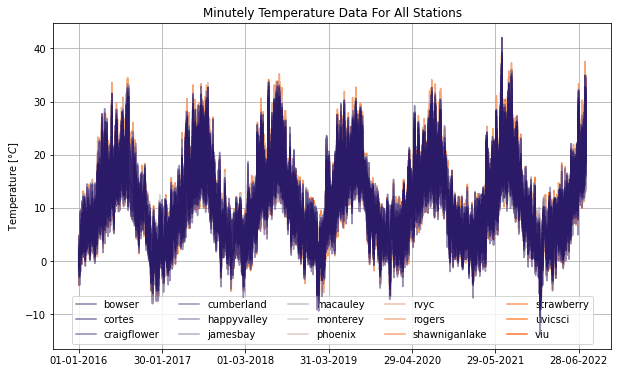

In [481]:
ff, (ax1) = plt.subplots(1, 1)
ff.set_figwidth(10)
ff.set_figheight(6)

# plots the hourly data:
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=395))

zzz = 15
alp=0.5
for idx in range(len(all_temps)):
    zzz-=1
    alp+=0.03
    ax1.plot(time+16801, all_temps[idx], color=colours[idx], label=labels[idx],zorder=zzz,alpha=alp)



ax1.legend(loc='lower center', borderaxespad=0.5, ncol=5)

ax1.set_title("Minutely Temperature Data For All Stations")
ax1.set_ylabel(r"Temperature [$\degree C$]" )
ax1.grid(True)

plt.savefig(path + 'hr_temp_time_series.png', format='png', dpi=300)

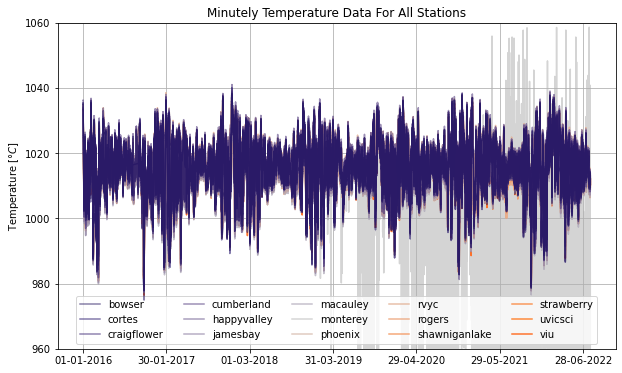

In [483]:
ff, (ax1) = plt.subplots(1, 1)
ff.set_figwidth(10)
ff.set_figheight(6)

# plots the hourly data:
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=395))

zzz = 15
alp=0.5
for idx in range(len(all_pres)):
    zzz-=1
    alp+=0.03
    if idx == 7:
        ax1.plot(time+16801, all_pres[idx], color=colours[idx], label=labels[idx],zorder=0,alpha=alp)
    else:
        ax1.plot(time+16801, all_pres[idx], color=colours[idx], label=labels[idx],zorder=zzz,alpha=alp)


ax1.legend(loc='lower center', borderaxespad=0.5, ncol=5)
ax1.set_ylim(960,1060)
ax1.set_title("Minutely Temperature Data For All Stations")
ax1.set_ylabel(r"Temperature [$\degree C$]" )
ax1.grid(True)

plt.savefig(path + 'hr_pres_time_series.png', format='png', dpi=300)

In [11]:
# total means of all the temperature data:

mean_temps = [np.nanmean(all_temps[idx]) for idx in range(len(all_temps))]

In [501]:
# need gridded data with 30 squares in the N-S direction and 50 in the E-W:

buffer =1.65

x_coordinates = np.linspace(min(longitude)-buffer, max(longitude)+buffer/3,30)
y_coordinates = np.linspace(min(latitude)-buffer, max(latitude)+buffer/3,50)

# data gridding:

grid_x, grid_y = np.meshgrid(x_coordinates, y_coordinates)

# natural neighbour interp:

#grid_x,grid_y, img = interpmp.interpolate_to_grid(longitude, latitude, mean_temps)
#img = np.ma.masked_where(np.isnan(img), img)




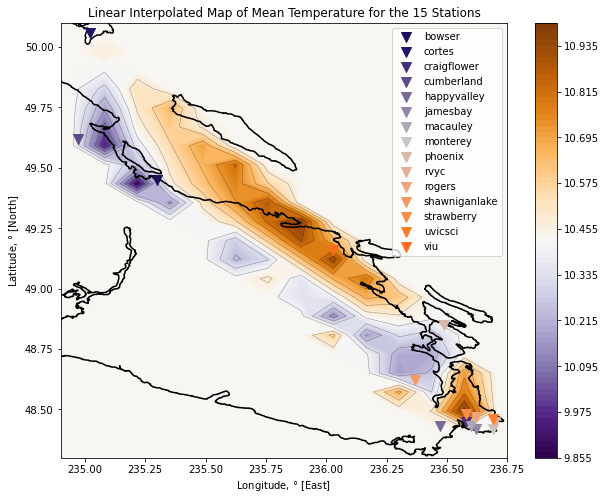

In [531]:

ff, (ax1) = plt.subplots(1, 1)
ff.set_figwidth(10)
ff.set_figheight(8)

for idx in range(len(coordinates[:,0])):
    ax1.scatter(coordinates[:,0][idx], coordinates[:,1][idx], label=labels[idx],s=100,marker='v',color=colours[idx],zorder=10)

zi = scipy.interpolate.griddata((longitude, latitude), mean_temps, (x_coordinates[None,:], y_coordinates[:,None]), method='linear',fill_value=10.426)

CS = ax1.contour(x_coordinates,y_coordinates,zi,15,linewidths=0.5,colors='k',alpha=0.4)
CS = ax1.contourf(x_coordinates,y_coordinates,zi,100,cmap='PuOr_r')
ax1.plot(coast_line[0], coast_line[1], 'k') 

ax1.legend()
ff.colorbar(CS,ax=ax1)
ax1.set_title(r"Linear Interpolated Map of Mean Temperature for the 15 Stations")
ax1.set_xlabel(r"Longitude, $\degree$ [East]")
ax1.set_ylabel(r"Latitude, $\degree$ [North]")
ax1.set_xlim(234.9,236.75)
ax1.set_ylim(48.3,50.1)

plt.savefig(path + 'hr_temp_mean_lininterp.png', format='png', dpi=300)

In [485]:
len_year=8760

len(all_temps[1][:len_year])

yr_mean_temps=[]

for i in range(6):
    mean_t = [np.nanmean(all_temps[idx][i*len_year:(i+1)*len_year]) for idx in range(len(all_temps))]
    
    yr_mean_temps.append(mean_t)


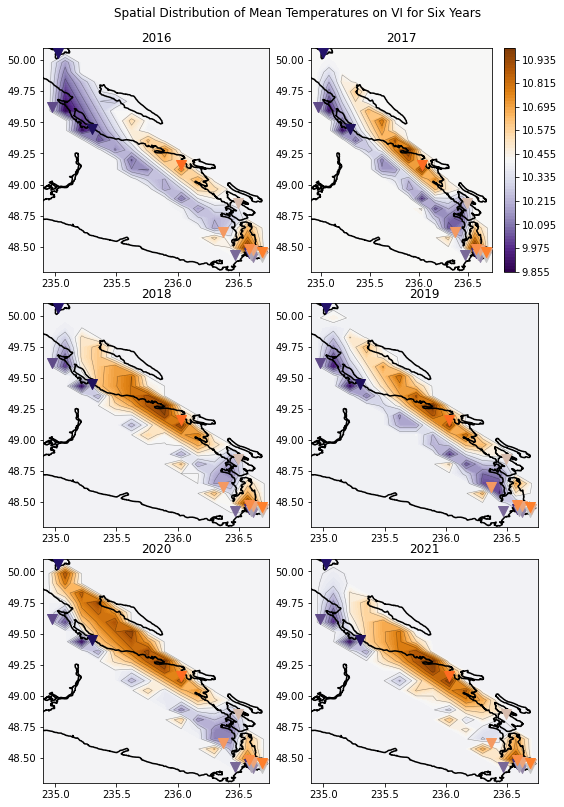

In [487]:
ff, (ax) = plt.subplots(3, 2)
ff.set_figwidth(8)
ff.set_figheight(12)
ff.tight_layout(rect=[0, 0.05, 0.95, 0.95])

for idx in range(len(coordinates[:,0])):
    ax[0][0].scatter(coordinates[:,0][idx], coordinates[:,1][idx], label=labels[idx],s=100,marker='v',color=colours[idx],zorder=10)
    ax[0][1].scatter(coordinates[:,0][idx], coordinates[:,1][idx], label=labels[idx],s=100,marker='v',color=colours[idx],zorder=10)
    ax[1][0].scatter(coordinates[:,0][idx], coordinates[:,1][idx], label=labels[idx],s=100,marker='v',color=colours[idx],zorder=10)
    ax[1][1].scatter(coordinates[:,0][idx], coordinates[:,1][idx], label=labels[idx],s=100,marker='v',color=colours[idx],zorder=10)
    ax[2][0].scatter(coordinates[:,0][idx], coordinates[:,1][idx], label=labels[idx],s=100,marker='v',color=colours[idx],zorder=10)
    ax[2][1].scatter(coordinates[:,0][idx], coordinates[:,1][idx], label=labels[idx],s=100,marker='v',color=colours[idx],zorder=10)

    
ax[0][0].plot(coast_line[0], coast_line[1], 'k')  
ax[0][1].plot(coast_line[0], coast_line[1], 'k')  
ax[1][0].plot(coast_line[0], coast_line[1], 'k')  
ax[1][1].plot(coast_line[0], coast_line[1], 'k')  
ax[2][0].plot(coast_line[0], coast_line[1], 'k')  
ax[2][1].plot(coast_line[0], coast_line[1], 'k')    
    
z16= scipy.interpolate.griddata((longitude, latitude), yr_mean_temps[0], (x_coordinates[None,:], y_coordinates[:,None]), method='linear',fill_value=11.059)
z17= scipy.interpolate.griddata((longitude, latitude), yr_mean_temps[1], (x_coordinates[None,:], y_coordinates[:,None]), method='linear',fill_value=10.15)
z18= scipy.interpolate.griddata((longitude, latitude), yr_mean_temps[2], (x_coordinates[None,:], y_coordinates[:,None]), method='linear',fill_value=10.8)
z19= scipy.interpolate.griddata((longitude, latitude), yr_mean_temps[3], (x_coordinates[None,:], y_coordinates[:,None]), method='linear',fill_value=10.39)
z20= scipy.interpolate.griddata((longitude, latitude), yr_mean_temps[4], (x_coordinates[None,:], y_coordinates[:,None]), method='linear',fill_value=10.47)
z21= scipy.interpolate.griddata((longitude, latitude), yr_mean_temps[5], (x_coordinates[None,:], y_coordinates[:,None]), method='linear',fill_value=10.49)

CS16 = ax[0][0].contour(x_coordinates,y_coordinates,z16,15,linewidths=0.5,colors='k',alpha=0.4)
CSf16 = ax[0][0].contourf(x_coordinates,y_coordinates,z16,100,cmap='PuOr_r')

CS17 = ax[0][1].contour(x_coordinates,y_coordinates,z17,15,linewidths=0.5,colors='k',alpha=0.4)
CSf17 = ax[0][1].contourf(x_coordinates,y_coordinates,z17,100,cmap='PuOr_r')

CS18 = ax[1][0].contour(x_coordinates,y_coordinates,z18,15,linewidths=0.5,colors='k',alpha=0.4)
CSf18 = ax[1][0].contourf(x_coordinates,y_coordinates,z18,100,cmap='PuOr_r')

CS19 = ax[1][1].contour(x_coordinates,y_coordinates,z19,15,linewidths=0.5,colors='k',alpha=0.4)
CSf19 = ax[1][1].contourf(x_coordinates,y_coordinates,z19,100,cmap='PuOr_r')

CS20 = ax[2][0].contour(x_coordinates,y_coordinates,z20,15,linewidths=0.5,colors='k',alpha=0.4)
CSf20 = ax[2][0].contourf(x_coordinates,y_coordinates,z20,100,cmap='PuOr_r')

CS21 = ax[2][1].contour(x_coordinates,y_coordinates,z21,15,linewidths=0.5,colors='k',alpha=0.4)
CSf21 = ax[2][1].contourf(x_coordinates,y_coordinates,z21,100,cmap='PuOr_r')

custom_xlim = (234.9, 236.75)
custom_ylim = (48.3,50.1)

# Setting the values for all axes.
plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)


#ax1.legend()
#ff.colorbar(CS,ax=ax[0][0])
ff.colorbar(CS,ax=ax[0][1])
#ff.colorbar(CS,ax=ax[1][0])
#ff.colorbar(CS,ax=ax[1][1])
#ff.colorbar(CS,ax=ax[2][0])
#ff.colorbar(CS,ax=ax[2][1])

ax[0][0].set_title(r"2016")
ax[0][1].set_title(r"2017")
ax[1][0].set_title(r"2018")
ax[1][1].set_title(r"2019")
ax[2][0].set_title(r"2020")
ax[2][1].set_title(r"2021")

ff.suptitle('Spatial Distribution of Mean Temperatures on VI for Six Years')


plt.show()

ff.savefig(path + 'hr_temp_spatial_dist.png', format='png', dpi=300)


In [21]:
import cartopy.crs as ccrs
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np

from eofs.standard import Eof
from eofs.examples import example_data_path


In [22]:
# removes all nan values and replaces them with zeroes

all_temps=np.array(all_temps)

all_temps=np.nan_to_num(all_temps)

In [23]:
# finds the first 6 empirical orthogonal functions:

solver2=Eof(np.array(all_temps).T)

eof1 = solver2.eofsAsCovariance(neofs=10)
eof2 = solver2.eofsAsCorrelation(neofs=5)

eof_plot = solver2.eofs(neofs=6)

array([6.47443213, 6.59091595, 6.01107206, 7.20435355, 6.32779343,
       4.77911893, 4.50685014, 4.79587734, 6.06427815, 4.46445554,
       6.05239741, 7.21269462, 5.63660664, 5.58073315, 6.63560324])

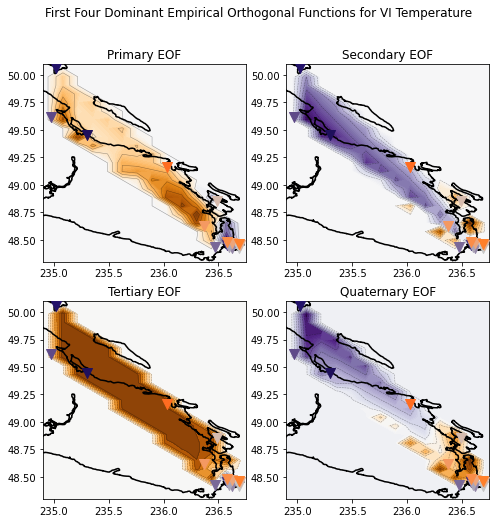

In [488]:


ff, (ax) = plt.subplots(2, 2)
ff.set_figwidth(8)
ff.set_figheight(8)

for idx in range(len(coordinates[:,0])):
    ax[0][0].scatter(coordinates[:,0][idx], coordinates[:,1][idx], label=labels[idx],s=100,marker='v',color=colours[idx],zorder=10)
    ax[0][1].scatter(coordinates[:,0][idx], coordinates[:,1][idx], label=labels[idx],s=100,marker='v',color=colours[idx],zorder=10)
    ax[1][0].scatter(coordinates[:,0][idx], coordinates[:,1][idx], label=labels[idx],s=100,marker='v',color=colours[idx],zorder=10)
    ax[1][1].scatter(coordinates[:,0][idx], coordinates[:,1][idx], label=labels[idx],s=100,marker='v',color=colours[idx],zorder=10)

z1 = scipy.interpolate.griddata((longitude, latitude), eof1[0], (x_coordinates[None,:], y_coordinates[:,None]), method='linear',fill_value=6.40)
z2 = scipy.interpolate.griddata((longitude, latitude), eof1[1], (x_coordinates[None,:], y_coordinates[:,None]), method='linear',fill_value=-0.28)
z3 = scipy.interpolate.griddata((longitude, latitude), eof1[2], (x_coordinates[None,:], y_coordinates[:,None]), method='linear',fill_value=-1.6)
z4 = scipy.interpolate.griddata((longitude, latitude), eof1[3], (x_coordinates[None,:], y_coordinates[:,None]), method='linear',fill_value=-0.35)

CS1 = ax[0][0].contour(x_coordinates,y_coordinates,z1,15,linewidths=0.5,colors='k',alpha=0.4)
CS1 = ax[0][0].contourf(x_coordinates,y_coordinates,z1,100,cmap='PuOr_r')
ax[0][0].plot(coast_line[0], coast_line[1], 'k') 

CS2 = ax[0][1].contour(x_coordinates,y_coordinates,z2,15,linewidths=0.5,colors='k',alpha=0.4)
CS2 = ax[0][1].contourf(x_coordinates,y_coordinates,z2,100,cmap='PuOr_r')
ax[0][1].plot(coast_line[0], coast_line[1], 'k') 

CS3 = ax[1][0].contour(x_coordinates,y_coordinates,z3,15,linewidths=0.5,colors='k',alpha=0.4)
CS3 = ax[1][0].contourf(x_coordinates,y_coordinates,z3,15,cmap='PuOr_r')
ax[1][0].plot(coast_line[0], coast_line[1], 'k') 

CS4 = ax[1][1].contour(x_coordinates,y_coordinates,z4,15,linewidths=0.5,colors='k',alpha=0.4)
CS4 = ax[1][1].contourf(x_coordinates,y_coordinates,z4,100,cmap='PuOr_r')
ax[1][1].plot(coast_line[0], coast_line[1], 'k') 



ax[0][0].set_title(r"Primary EOF")
ax[0][1].set_title(r"Secondary EOF")
ax[1][0].set_title(r"Tertiary EOF")
ax[1][1].set_title(r"Quaternary EOF")

custom_xlim = (234.9, 236.75)
custom_ylim = (48.3,50.1)

# Setting the values for all axes.
plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)



# ff.colorbar(CS1,ax=ax[0][0])
# ff.colorbar(CS2,ax=ax[0][1])
# ff.colorbar(CS3,ax=ax[1][0])
# ff.colorbar(CS4,ax=ax[1][1])


#ff.tight_layout(pad=0)

ff.suptitle("First Four Dominant Empirical Orthogonal Functions for VI Temperature")
plt.show()


# ax1.legend()
# ff.colorbar(CS,ax=ax1)
# ax1.set_title(r"Linear Interpolated Map of Mean Temperature for the 15 Stations")
# ax1.set_xlabel(r"Longitude, $\degree$ [East]")
# ax1.set_ylabel(r"Latitude, $\degree$ [North]")
# ax1.set_xlim(234.9,236.75)
# ax1.set_ylim(48.3,50.1)


ff.savefig(path + 'hr_temp_eof.png', format='png', dpi=300)


In [522]:


# removes all nan values and replaces them with zeroes

all_pres=np.array(all_pres)

all_pres=np.nan_to_num(all_pres)

solverp=Eof(np.array(all_pres).T)

eof_plot_p = solverp.eofs(neofs=6)
eof_p = solverp.eofsAsCovariance(neofs=6)
eof_p2 = solverp.eofsAsCorrelation(neofs=6)

In [523]:
eof_p2[0]

array([-2.01432336e-03, -6.07787651e-03, -2.62650675e-03, -3.29076103e-03,
       -3.76835024e-03,  3.18272587e-03, -9.59152775e-01, -1.08760608e-01,
       -6.20028177e-03,  1.05086046e-01, -9.85535123e-03, -8.08651958e-03,
       -5.14415075e-01, -1.12450796e-04, -6.73652824e-03])

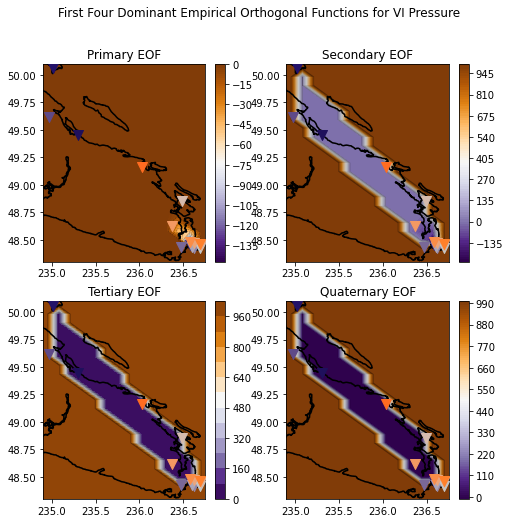

In [530]:
ff, (ax) = plt.subplots(2, 2)
ff.set_figwidth(8)
ff.set_figheight(8)

for idx in range(len(coordinates[:,0])):
    ax[0][0].scatter(coordinates[:,0][idx], coordinates[:,1][idx], label=labels[idx],s=100,marker='v',color=colours[idx],zorder=10)
    ax[0][1].scatter(coordinates[:,0][idx], coordinates[:,1][idx], label=labels[idx],s=100,marker='v',color=colours[idx],zorder=10)
    ax[1][0].scatter(coordinates[:,0][idx], coordinates[:,1][idx], label=labels[idx],s=100,marker='v',color=colours[idx],zorder=10)
    ax[1][1].scatter(coordinates[:,0][idx], coordinates[:,1][idx], label=labels[idx],s=100,marker='v',color=colours[idx],zorder=10)

z1 = scipy.interpolate.griddata((longitude, latitude), eof_p[0], (x_coordinates[None,:], y_coordinates[:,None]), method='linear',fill_value=-0.2)
z2 = scipy.interpolate.griddata((longitude, latitude), eof_p[1], (x_coordinates[None,:], y_coordinates[:,None]), method='linear',fill_value=1000)
z3 = scipy.interpolate.griddata((longitude, latitude), eof_p[2], (x_coordinates[None,:], y_coordinates[:,None]), method='linear',fill_value=1000)
z4 = scipy.interpolate.griddata((longitude, latitude), eof_p[3], (x_coordinates[None,:], y_coordinates[:,None]), method='linear',fill_value=1000)

CS1 = ax[0][0].contour(x_coordinates,y_coordinates,z1,15,linewidths=0.5,colors='k',alpha=0.4)
CS1 = ax[0][0].contourf(x_coordinates,y_coordinates,z1,100,cmap='PuOr_r')
ax[0][0].plot(coast_line[0], coast_line[1], 'k') 

CS2 = ax[0][1].contour(x_coordinates,y_coordinates,z2,15,linewidths=0.5,colors='k',alpha=0.4)
CS2 = ax[0][1].contourf(x_coordinates,y_coordinates,z2,100,cmap='PuOr_r')
ax[0][1].plot(coast_line[0], coast_line[1], 'k') 

CS3 = ax[1][0].contour(x_coordinates,y_coordinates,z3,15,linewidths=0.5,colors='k',alpha=0.4)
CS3 = ax[1][0].contourf(x_coordinates,y_coordinates,z3,15,cmap='PuOr_r')
ax[1][0].plot(coast_line[0], coast_line[1], 'k') 

CS4 = ax[1][1].contour(x_coordinates,y_coordinates,z4,15,linewidths=0.5,colors='k',alpha=0.4)
CS4 = ax[1][1].contourf(x_coordinates,y_coordinates,z4,100,cmap='PuOr_r')
ax[1][1].plot(coast_line[0], coast_line[1], 'k') 



ax[0][0].set_title(r"Primary EOF")
ax[0][1].set_title(r"Secondary EOF")
ax[1][0].set_title(r"Tertiary EOF")
ax[1][1].set_title(r"Quaternary EOF")

custom_xlim = (234.9, 236.75)
custom_ylim = (48.3,50.1)

# Setting the values for all axes.
plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)



ff.colorbar(CS1,ax=ax[0][0])
ff.colorbar(CS2,ax=ax[0][1])
ff.colorbar(CS3,ax=ax[1][0])
ff.colorbar(CS4,ax=ax[1][1])


#ff.tight_layout(pad=0)

ff.suptitle("First Four Dominant Empirical Orthogonal Functions for VI Pressure")
plt.show()


# ax1.legend()
# ff.colorbar(CS,ax=ax1)
# ax1.set_title(r"Linear Interpolated Map of Mean Temperature for the 15 Stations")
# ax1.set_xlabel(r"Longitude, $\degree$ [East]")
# ax1.set_ylabel(r"Latitude, $\degree$ [North]")
# ax1.set_xlim(234.9,236.75)
# ax1.set_ylim(48.3,50.1)


ff.savefig(path + 'hr_temp_eof.png', format='png', dpi=300)


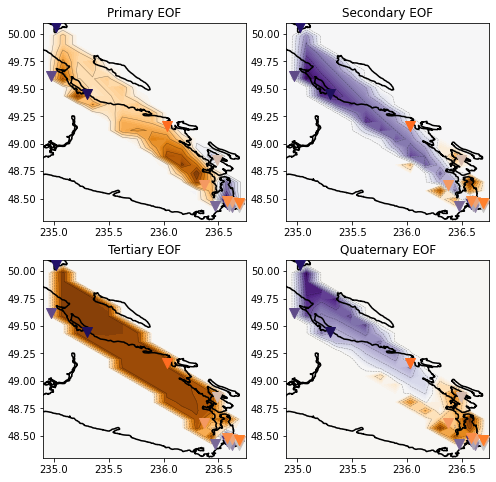

In [489]:





# Compute anomalies by removing the time-mean.
ff, (ax) = plt.subplots(2, 2)
ff.set_figwidth(8)
ff.set_figheight(8)

# normalize colormap:

min_val, max_val = np.amin(eof_plot[2]), np.amax(eof_plot[0])

for idx in range(len(coordinates[:,0])):
    ax[0][0].scatter(coordinates[:,0][idx], coordinates[:,1][idx], label=labels[idx],s=100,marker='v',color=colours[idx],zorder=10)
    ax[0][1].scatter(coordinates[:,0][idx], coordinates[:,1][idx], label=labels[idx],s=100,marker='v',color=colours[idx],zorder=10)
    ax[1][0].scatter(coordinates[:,0][idx], coordinates[:,1][idx], label=labels[idx],s=100,marker='v',color=colours[idx],zorder=10)
    ax[1][1].scatter(coordinates[:,0][idx], coordinates[:,1][idx], label=labels[idx],s=100,marker='v',color=colours[idx],zorder=10)

z1 = scipy.interpolate.griddata((longitude, latitude), eof_plot[0], (x_coordinates[None,:], y_coordinates[:,None]), method='linear',fill_value=0.277)
z2 = scipy.interpolate.griddata((longitude, latitude), eof_plot[1], (x_coordinates[None,:], y_coordinates[:,None]), method='linear',fill_value=-0.064)
z3 = scipy.interpolate.griddata((longitude, latitude), eof_plot[2], (x_coordinates[None,:], y_coordinates[:,None]), method='linear',fill_value=-0.39)
z4 = scipy.interpolate.griddata((longitude, latitude), eof_plot[3], (x_coordinates[None,:], y_coordinates[:,None]), method='linear',fill_value=-0.12)

CS1 = ax[0][0].contour(x_coordinates,y_coordinates,z1,15,linewidths=0.5,colors='k',alpha=0.4)
CS1 = ax[0][0].contourf(x_coordinates,y_coordinates,z1,100,cmap='PuOr_r')
ax[0][0].plot(coast_line[0], coast_line[1], 'k') 

CS2 = ax[0][1].contour(x_coordinates,y_coordinates,z2,15,linewidths=0.5,colors='k',alpha=0.4)
CS2 = ax[0][1].contourf(x_coordinates,y_coordinates,z2,100,cmap='PuOr_r')
ax[0][1].plot(coast_line[0], coast_line[1], 'k') 

CS3 = ax[1][0].contour(x_coordinates,y_coordinates,z3,15,linewidths=0.5,colors='k',alpha=0.4)
CS3 = ax[1][0].contourf(x_coordinates,y_coordinates,z3,30,cmap='PuOr_r')
ax[1][0].plot(coast_line[0], coast_line[1], 'k') 

CS4 = ax[1][1].contour(x_coordinates,y_coordinates,z4,15,linewidths=0.5,colors='k',alpha=0.4)
CS4 = ax[1][1].contourf(x_coordinates,y_coordinates,z4,100,cmap='PuOr_r')
ax[1][1].plot(coast_line[0], coast_line[1], 'k') 



ax[0][0].set_title(r"Primary EOF")
ax[0][1].set_title(r"Secondary EOF")
ax[1][0].set_title(r"Tertiary EOF")
ax[1][1].set_title(r"Quaternary EOF")

custom_xlim = (234.9, 236.75)
custom_ylim = (48.3,50.1)

# Setting the values for all axes.
plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)



#ff.colorbar(CS1,ax=ax[0][0])
#ff.colorbar(CS2,ax=ax[0][1])
#ff.colorbar(CS3,ax=ax[1][0])
#ff.colorbar(CS4,ax=ax[1][1])


#ff.tight_layout(pad=0)


plt.show()

ff.savefig(path + 'hr_temp_eof2.png', format='png', dpi=300)

In [255]:
pc1 = solver2.pcs(npcs=5,pcscaling=1).T

var_fracs = solver2.varianceFraction(neigs=6)



In [256]:
var_fracs

array([0.90286294, 0.03209837, 0.02702758, 0.0115784 , 0.00714873,
       0.00463805])

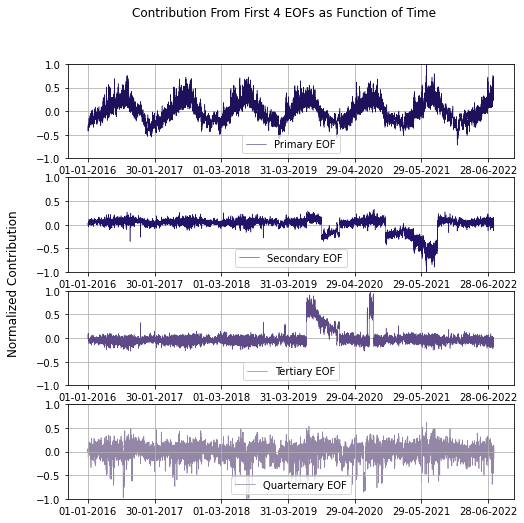

In [490]:
ff, (ax1,ax2,ax3,ax4) = plt.subplots(4, 1)
ff.set_figwidth(8)
ff.set_figheight(8)

# plots the hourly data:
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=395))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=395))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=395))
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=395))

ax1.plot(time+16801, pc1[0]/max(pc1[0]), color=colours[0], linewidth=0.5,zorder=4,alpha=1, label="Primary EOF")

ax2.plot(time+16801, pc1[1]/abs(min(pc1[1])), color=colours[1], linewidth=0.5, zorder=4,alpha=1,label="Secondary EOF")

ax3.plot(time+16801, pc1[2]/(max(pc1[2])), color=colours[3], linewidth=0.5,alpha=1,zorder=3,label="Tertiary EOF")

ax4.plot(time+16801, pc1[3]/abs(min(pc1[3])), color=colours[5], linewidth=0.7, alpha=1,zorder=0, label="Quarternary EOF")

#plt.plot(time, pc1[4], color='c', linewidth=2)

ff.suptitle("Contribution From First 4 EOFs as Function of Time")
ff.supylabel(r"Normalized Contribution" )

ax1.legend(loc='lower center', borderaxespad=0.5, ncol=2)
ax1.grid(True)
ax1.set_ylim(-1,1)

ax2.legend(loc='lower center', borderaxespad=0.5, ncol=2)
ax2.grid(True)
ax2.set_ylim(-1,1)


ax3.legend(loc='lower center', borderaxespad=0.5, ncol=2)
ax3.grid(True)
ax3.set_ylim(-1,1)


ax4.legend(loc='lower center', borderaxespad=0.5, ncol=2)
ax4.grid(True)
ax4.set_ylim(-1,1)

plt.plot()

plt.savefig(path + 'hr_temp_eof_contributions.png', format='png', dpi=300)

In [445]:
from shapely.geometry import Point, Polygon

# Create Point objects
p1 = Point(235.5, 49)
p2 = Point(24.895, 60.05)

# Create a square
coords = coast_line.T
poly = Polygon(coords)



In [55]:
x_coordinates2 = np.linspace(min(longitude)-buffer, max(longitude)+buffer/3,300)
y_coordinates2 = np.linspace(min(latitude)-buffer, max(latitude)+buffer/3,450)

# data gridding:

grid_x2, grid_y2 = np.meshgrid(x_coordinates2, y_coordinates2)

In [56]:
z_in = scipy.interpolate.griddata((longitude, latitude), mean_temps, (x_coordinates2[None,:], y_coordinates2[:,None]), method='linear',fill_value=10.426)


In [57]:
z_in.shape

(450, 300)

In [58]:
zz=np.zeros((450,300))
for xx in range(len(z_in)):
    for yy in range(len(z_in[xx])):
        pp = Point(grid_x2[xx][yy], grid_y2[xx][yy])
        if pp.within(poly)==True:
            zz[xx][yy]=z_in[xx][yy]
        elif pp.within(poly)==False:
            zz[xx][yy]=np.nan

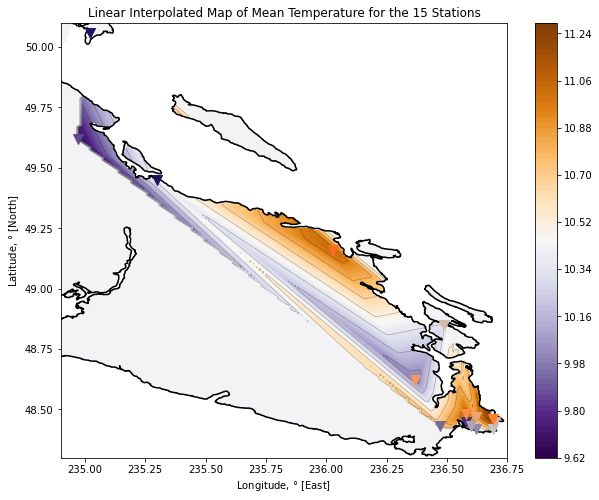

In [491]:
ff, (ax1) = plt.subplots(1, 1)
ff.set_figwidth(10)
ff.set_figheight(8)

for idx in range(len(coordinates[:,0])):
    ax1.scatter(coordinates[:,0][idx], coordinates[:,1][idx], label=labels[idx],s=100,marker='v',color=colours[idx],zorder=10)


CS = ax1.contour(x_coordinates2,y_coordinates2,zz,15,linewidths=0.5,colors='k',alpha=0.4)
CS = ax1.contourf(x_coordinates2,y_coordinates2,zz,100,cmap='PuOr_r')
ax1.plot(coast_line[0], coast_line[1], 'k') 

#ax1.legend()
ff.colorbar(CS,ax=ax1)
ax1.set_title(r"Linear Interpolated Map of Mean Temperature for the 15 Stations")
ax1.set_xlabel(r"Longitude, $\degree$ [East]")
ax1.set_ylabel(r"Latitude, $\degree$ [North]")
ax1.set_xlim(234.9,236.75)
ax1.set_ylim(48.3,50.1)

plt.savefig(path + 'hr_temp_lininterp_coast.png', format='png', dpi=300)


In [192]:
def global_interp(grid_x, grid_y, X, Y, Z):
    '''
    Does a global interpolation in the X-Y plane 
    based on a gridded data set with an interpolation 
    scheme with 1/r^2 as the weighting
    
    grid_x = x gridded points to interpolate to
    grid_y = y gridded points to interpolate to
    X = x scattered data points to interpolate from
    Y = y scattered data points to interpolage from
    Z = magnitude of the last variable in X-Y plane
    '''
    # shapes of the x, y grids:
    shape_of_x = np.shape(grid_x)
    shape_of_y = np.shape(grid_y)
    
    # flattens arrays to work with easier:
    flattened_x = grid_x.flatten()
    flattened_y = grid_y.flatten()
    
    # initializes a variable to store values:
    values = []
    
    # loops through the entire grid in both the global grid and magnitude values 
    # to apply a 1/r^2 weighting:
    
    for xx,yy in zip(flattened_x,flattened_y):
        # radius
        radial = []
        for dx, dy in zip(X, Y):
            Dx = dx-xx
            Dy = dy-yy
            radial_i = Dx**2 + Dy**2
            radial.append(radial_i)
            
        # weights on each grid cell
        weightings = 1/(np.array(radial))
        total_weight = sum(weightings)
        
        # final value in a certain grid cell:
        value = sum(np.multiply(weightings,np.array(Z)))/total_weight
        values.append(value)
        
    # reshapes the final matrix to correspond with the shape of te input matrices:
    gridded_values = np.array(values).reshape(shape_of_x)
    
    return gridded_values

In [210]:
len_year=8760

time_2_bday = 37224
bday_temps=[all_temps[idx][time_2_bday:time_2_bday+24] for idx in range(len(all_temps))]

bday_temps_mean = [np.nanmean(bday_temps[idx]) for idx in range(len(bday_temps))]


In [231]:


x_coordinates3 = np.linspace(min(longitude)-buffer, max(longitude)+buffer/3,150)
y_coordinates3 = np.linspace(min(latitude)-buffer, max(latitude)+buffer/3,200)

# data gridding:

grid_x3, grid_y3 = np.meshgrid(x_coordinates3, y_coordinates3)

interp_bday = global_interp(grid_x3, grid_y3, longitude, latitude, bday_temps_mean)


In [233]:
zbday=np.zeros((200,150))
for xx in range(len(interp_bday)):
    for yy in range(len(interp_bday[xx])):
        pp = Point(grid_x3[xx][yy], grid_y3[xx][yy])
        if pp.within(poly)==True:
            zbday[xx][yy]=interp_bday[xx][yy]
        elif pp.within(poly)==False:
            zbday[xx][yy]=np.nan

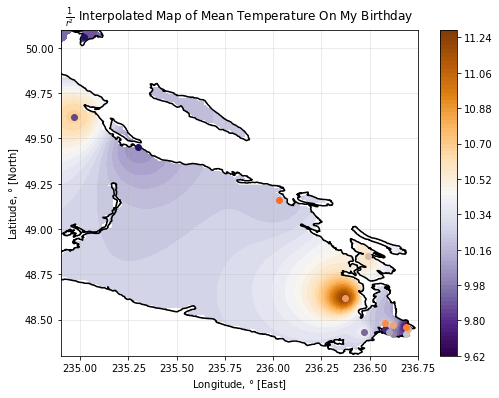

In [492]:
width=8
height=6
ff, (ax1) = plt.subplots(1,1)
ff.set_figwidth(width)
ff.set_figheight(height)

for idx in range(len(coordinates[:,0])):
    ax1.scatter(coordinates[:,0][idx], coordinates[:,1][idx], label=labels[idx],color=colours[idx],zorder=10)


    
ax1.contourf(grid_x3,grid_y3, zbday,50, cmap = 'PuOr')    
ax1.plot(coast_line[0], coast_line[1], 'k') 

#ax1.legend()
ff.colorbar(CS,ax=ax1)
ax1.set_title(r"$\frac{1}{r^2}$ Interpolated Map of Mean Temperature On My Birthday")
ax1.set_xlabel(r"Longitude, $\degree$ [East]")
ax1.set_ylabel(r"Latitude, $\degree$ [North]")
ax1.set_xlim(234.9,236.75)
ax1.set_ylim(48.3,50.1)
#ax1.legend(bbox_to_anchor=(1.02, 0.8), loc='upper left', borderaxespad=0)
ax1.grid(True, alpha=0.3, zorder=0)

plt.savefig(path + 'hr_temp_rsquareinterp_coast.png', format='png', dpi=300)


In [506]:
max(coast_line[0]), max(coast_line[1])

(236.73525, 50.876611)

In [507]:
min(coast_line[0]),min(coast_line[1])

(233.465189, 48.307833)

In [411]:
import pywt

scale_max=50

scales = np.arange(1, scale_max)  # No. of scales
coef, freqs = pywt.cwt(uvicsci_t, scales, 'morl')  # Finding CWT using gaussian wavelet



In [413]:
coef

array([[ 1.38424513e-04, -4.05108782e-01, -1.45163963e-01, ...,
         1.15733207e-01, -4.44429664e-01, -3.64637272e+00],
       [ 5.39265309e-02,  3.83124767e-01, -3.24026729e-01, ...,
         1.48414288e+00, -4.48691758e+00,  4.99669301e+00],
       [-1.97505652e-01,  1.08086489e+00,  2.13362906e-01, ...,
        -6.43237401e+00, -2.22980305e-02,  1.00033735e+01],
       ...,
       [-1.20377673e+00, -8.71143931e-01, -4.29852294e-01, ...,
         1.00498935e+01,  7.76903166e+00,  2.54428719e+00],
       [-1.10549077e+00, -8.36655172e-01, -2.80652406e-01, ...,
         9.87706909e+00,  7.88834666e+00,  2.51070440e+00],
       [-1.01931711e+00, -7.29508586e-01, -2.07739128e-01, ...,
         9.80143690e+00,  7.64994640e+00,  2.25872190e+00]])

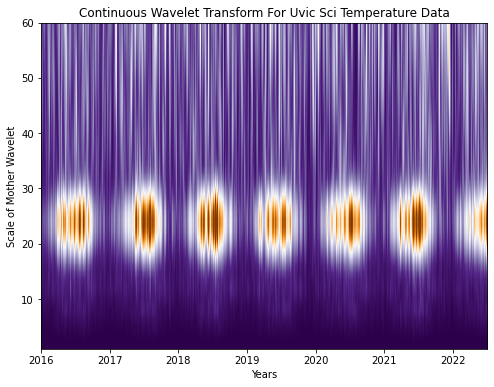

In [493]:
width=8
height=6
ff, (ax1) = plt.subplots(1,1)
ff.set_figwidth(width)
ff.set_figheight(height)


#plt.figure(figsize=(15, 10))
ax1.imshow(abs(coef), extent=[2016,2022.5, scale_max, 1], interpolation='bilinear', cmap='PuOr_r',
           aspect='auto', vmax=15, vmin=0.1)#abs(coef).max(), vmin=abs(coef).min())
plt.gca().invert_yaxis()


#ax1.set_xscale('log', base=10)
#ax1.set_yscale('log', base=10)
ax1.set_title("Continuous Wavelet Transform For Uvic Sci Temperature Data")
ax1.set_ylabel("Scale of Mother Wavelet")
ax1.set_xlabel("Years")
plt.show()


ff.savefig(path + 'hr_temp_wavelet.png', format='png', dpi=300)

In [494]:
import pywt

scale_max=60

scales2 = np.arange(1, scale_max)  # No. of scales
coef2, freqs2 = pywt.cwt(uvicsci_p, scales, 'morl')  # Finding CWT using gaussian wavelet


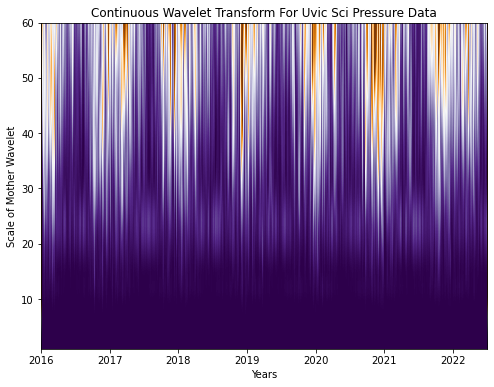

In [495]:
width=8
height=6
ff, (ax1) = plt.subplots(1,1)
ff.set_figwidth(width)
ff.set_figheight(height)


#plt.figure(figsize=(15, 10))
ax1.imshow(abs(coef2), extent=[2016,2022.5, scale_max, 1], interpolation='bilinear', cmap='PuOr_r',
           aspect='auto', vmax=30, vmin=0.5)#abs(coef).max(), vmin=abs(coef).min())
plt.gca().invert_yaxis()


#ax1.set_xscale('log', base=10)
#ax1.set_yscale('log', base=10)
ax1.set_title("Continuous Wavelet Transform For Uvic Sci Pressure Data")
ax1.set_ylabel("Scale of Mother Wavelet")
ax1.set_xlabel("Years")
plt.show()

ff.savefig(path + 'hr_pres_wavelet.png', format='png', dpi=300)

In [496]:
scale_max=60

scales2 = np.arange(1, scale_max)  # No. of scales
coef2, freqs2 = pywt.cwt(uvicsci_t[time_2_bday:time_2_bday+24], scales, 'gaus7')  # Finding CWT using gaussian wavelet


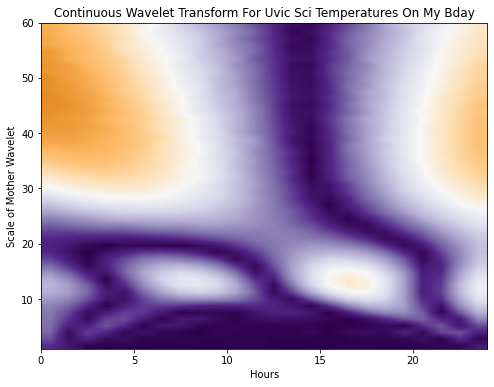

In [497]:
width=8
height=6
ff, (ax1) = plt.subplots(1,1)
ff.set_figwidth(width)
ff.set_figheight(height)


#plt.figure(figsize=(15, 10))
ax1.imshow(abs(coef2), extent=[0,24, scale_max, 1], interpolation='bilinear', cmap='PuOr_r',
           aspect='auto', vmax=23, vmin=0)#abs(coef).max(), vmin=abs(coef).min())
plt.gca().invert_yaxis()


#ax1.set_xscale('log', base=10)
#ax1.set_yscale('log', base=10)
ax1.set_title("Continuous Wavelet Transform For Uvic Sci Temperatures On My Bday")
ax1.set_ylabel("Scale of Mother Wavelet")
ax1.set_xlabel("Hours")
plt.show()

ff.savefig(path + 'hr_bday_wavelet.png', format='png', dpi=300)

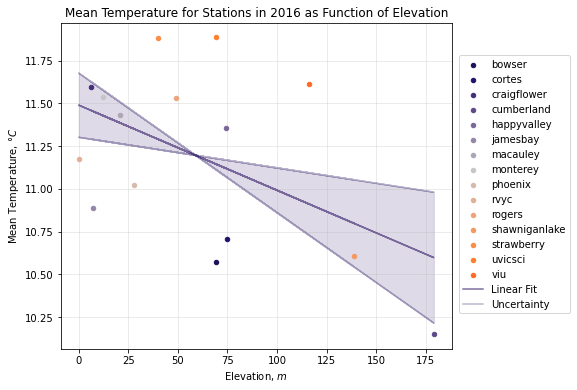

In [498]:



means_temp = [np.nanmean(all_temps[i][0*len_year:1*len_year]) for i in range(len(all_temps))]
means_pres= [np.nanmean(all_pres[i]) for i in range(len(all_pres))]

means_el_reg = sp.stats.linregress(elevation, means_temp)

# uncertainty:
t_alpha = sp.stats.t.ppf(1-0.2/2, len(means_temp)-2)

err_factor = t_alpha * means_el_reg.stderr
upper_slope = means_el_reg.slope + err_factor
lower_slope = means_el_reg.slope - err_factor

upper_fit = upper_slope * elevation + means_el_reg.intercept
lower_fit = lower_slope * elevation + means_el_reg.intercept

center = [np.mean(elevation), np.mean(means_temp)]

differences = [(upper_slope * center[0] + means_el_reg.intercept)-center[1]
               ,(lower_slope*center[0] + means_el_reg.intercept) -center[1]]

upper_fit = upper_slope * elevation + means_el_reg.intercept - differences[0]
lower_fit = lower_slope * elevation + means_el_reg.intercept - differences[1]


interp_up = interp1d(elevation,upper_fit)
interp_down = interp1d(elevation, lower_fit)

ff, (ax1)= plt.subplots(1,1)
ff.set_figwidth(7)
ff.set_figheight(6)

#ax1.scatter(elevation, means_temp, color=colours[0])

for idx in range(len(coordinates[:,0])):
    ax1.scatter(elevation[idx], means_temp[idx],label=labels[idx],s=20,marker='o',color=colours[idx],zorder=10)




ax1.plot(elevation, means_el_reg.slope * np.array(elevation) + means_el_reg.intercept,
         color=colours[3],alpha=0.8, label="Linear Fit" )

ax1.plot(elevation, upper_fit ,color=colours[0], 
         label="Uncertainty",alpha=0.3)
ax1.plot(elevation, lower_fit,color=colours[0],alpha=0.3)

xxx=np.linspace(0,179,80)



ax1.fill_between(xxx,interp_up(xxx), interp_down(xxx), interpolate=True, color=colours[3], alpha=0.2)
ax1.grid(which='both', alpha=0.3)
ax1.legend()
ax1.set_title("Mean Temperature for Stations in 2016 as Function of Elevation")
ax1.set_ylabel(r"Mean Temperature, $\degree C$")
ax1.set_xlabel(r"Elevation, $m$")
ax1.legend(bbox_to_anchor=(1.02, 0.9), loc='upper left', borderaxespad=0)

plt.show()

ff.savefig(path + 'hr_temp_elevation.png', format='png', dpi=300)

In [374]:
means_el_reg.slope

-0.004269105006699806